## Imports

In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() # Apply seaborn theme to plots

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

## Load TensorBoard data

In [2]:
log_folder = "logs/"

run_data = []

for run_folder in os.listdir(log_folder):
    event_acc = EventAccumulator(log_folder + run_folder).Reload()
    train_mean_reward_steps = [event.step for event in event_acc.Scalars("rollout/ep_rew_mean")]
    train_mean_reward_values = [event.value for event in event_acc.Scalars("rollout/ep_rew_mean")]
    eval_mean_reward_steps = [event.step for event in event_acc.Scalars("eval/mean_reward")]
    eval_mean_reward_values = [event.value for event in event_acc.Scalars("eval/mean_reward")]

    run_data.append({
        "algorithm": run_folder.split("-")[0],
        "gamma": float(run_folder.split("-")[1]),
        "learning_rate": float(run_folder.split("-")[2]),
        "normalize_env": bool(run_folder.split("-")[3]),
        "activation": run_folder.split("-")[4],
        "architecture": run_folder.split("-")[5][:-2],
        "train_mean_reward_steps": train_mean_reward_steps,
        "train_mean_reward_values": train_mean_reward_values,
        "eval_mean_reward_steps": eval_mean_reward_steps,
        "eval_mean_reward_values": eval_mean_reward_values,
    })

## Select best runs

In [3]:
k = 3

run_data_a2c = [run for run in run_data if run["algorithm"] == "A2C"]
run_data_a2c_best = sorted(
    run_data_a2c, 
    key=lambda run: max(run["eval_mean_reward_values"]), reverse=True
)[:k]

run_data_ppo = [run for run in run_data if run["algorithm"] == "PPO"]
run_data_ppo_best = sorted(
    run_data_ppo, 
    key=lambda run: max(run["eval_mean_reward_values"]), reverse=True
)[:k]

## Plot A2C best runs

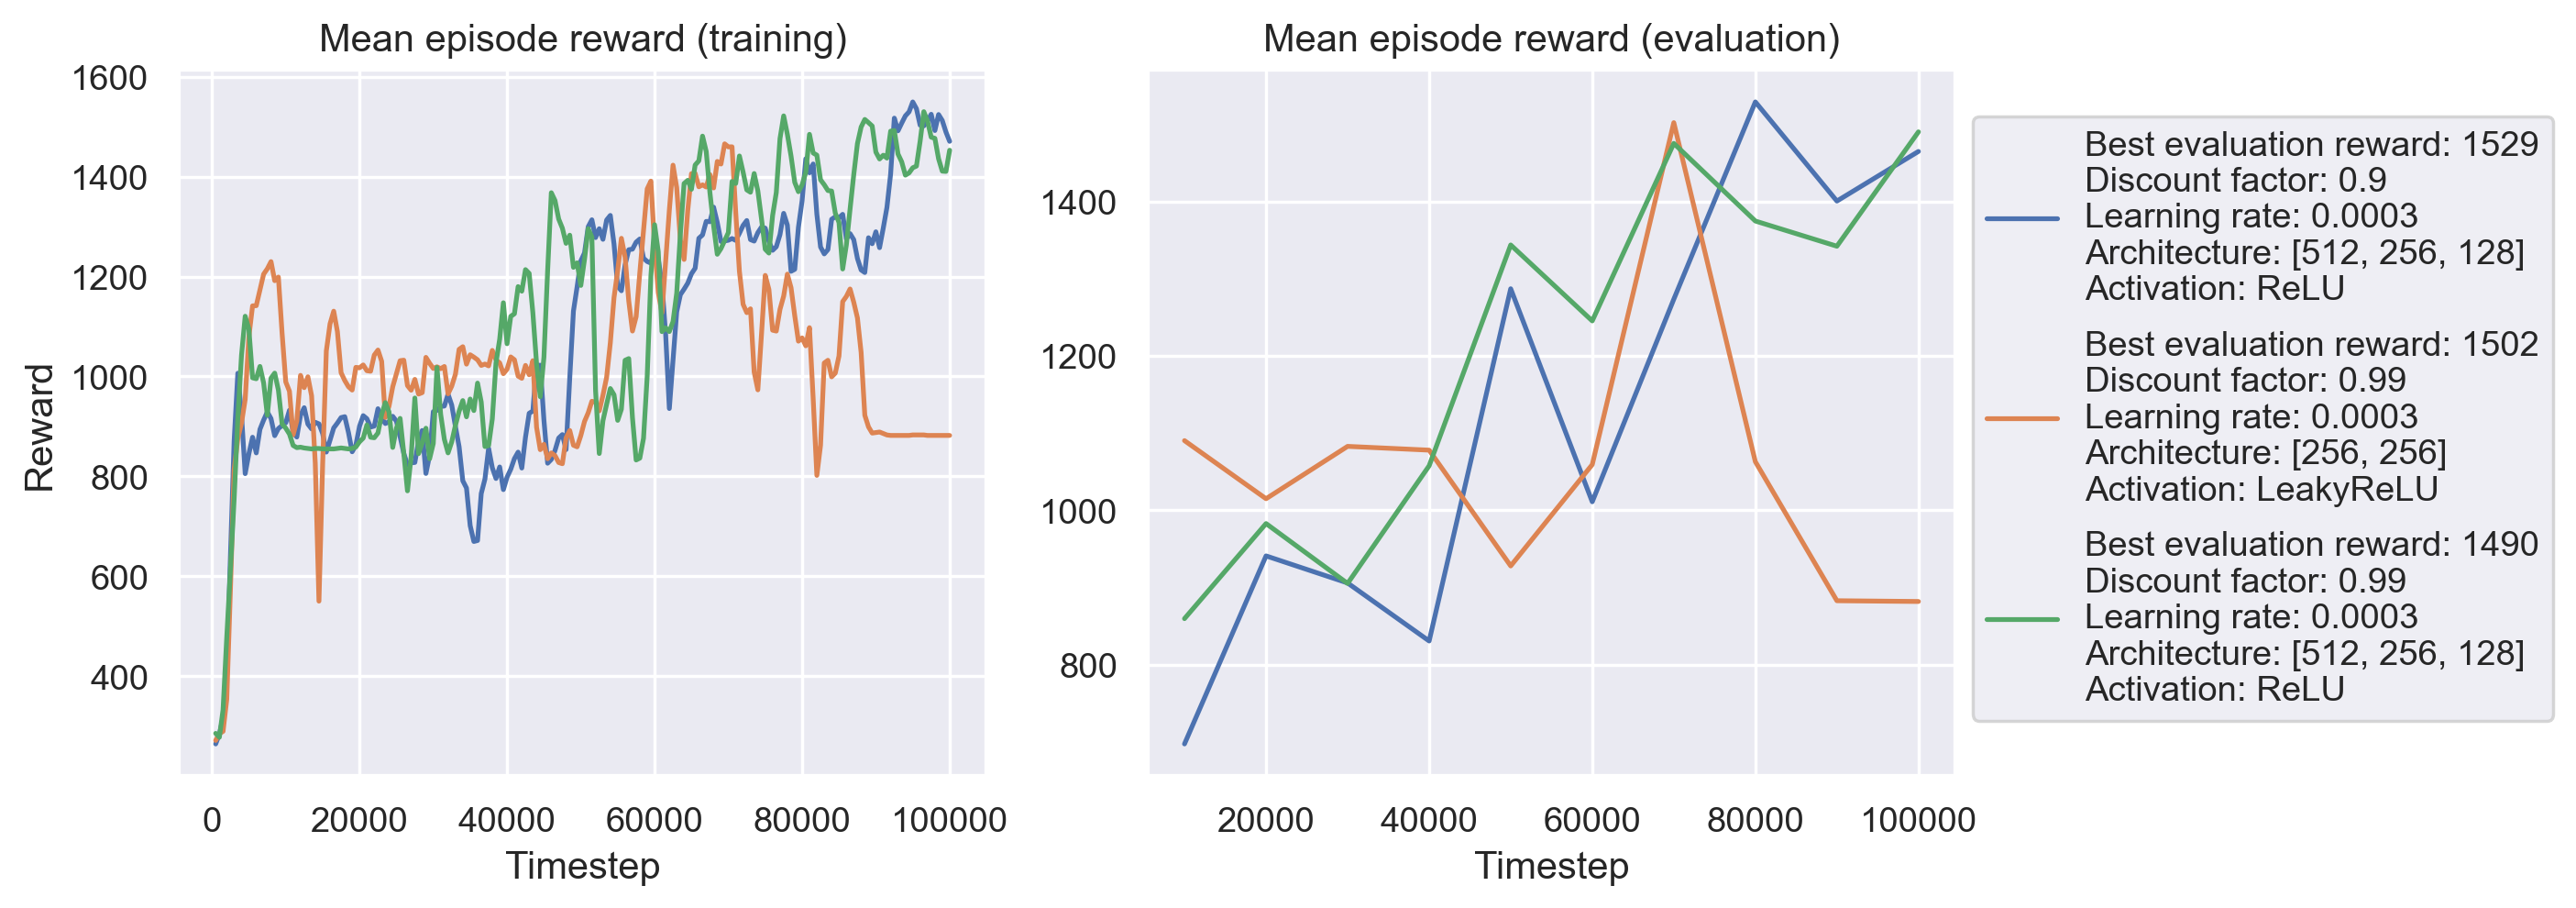

In [7]:
fig, (ax_left, ax_right) = plt.subplots(1, 2, dpi=250, figsize=(10, 4))
ax_left.set_xlabel("Timestep")
ax_right.set_xlabel("Timestep")
ax_left.set_ylabel("Reward")
ax_left.set_title("Mean episode reward (training)")
ax_right.set_title("Mean episode reward (evaluation)")

for run in run_data_a2c_best:
    ax_left.plot(
        run["train_mean_reward_steps"], 
        run["train_mean_reward_values"],
        label=f"Best evaluation reward: {round(max(run['eval_mean_reward_values']))}\nDiscount factor: {run['gamma']}\nLearning rate: {run['learning_rate']}\nArchitecture: {run['architecture']}\nActivation: {run['activation']}"
    )
    ax_right.plot(run["eval_mean_reward_steps"], run["eval_mean_reward_values"])

handles, labels = ax_left.get_legend_handles_labels()
fig.legend(handles, labels, loc="center left", ncols=1, bbox_to_anchor=(0.9, 0.5), labelspacing=0.7)

fig.savefig("plots/best-runs-a2c.png", bbox_inches="tight")

## Plot PPO best runs

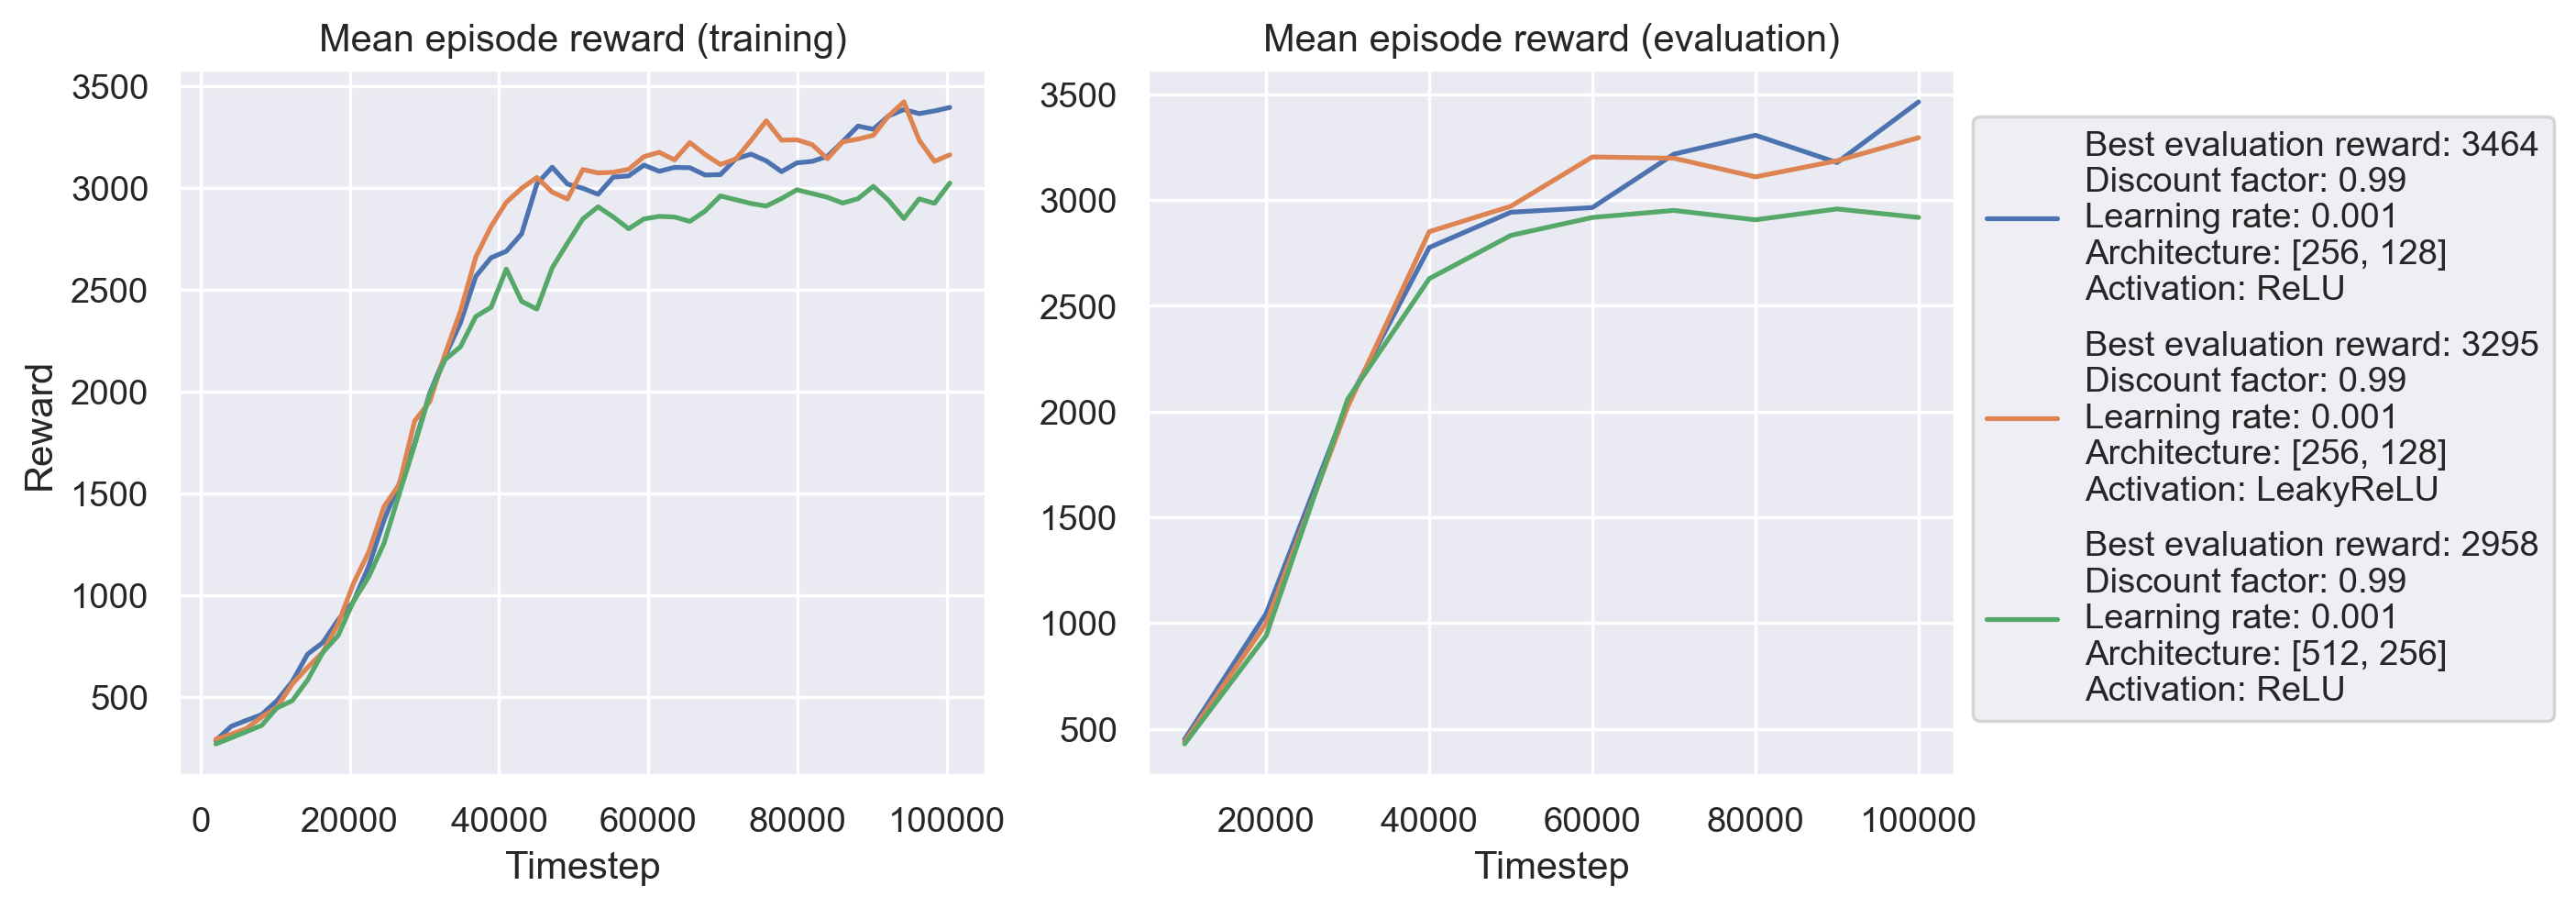

In [6]:
fig, (ax_left, ax_right) = plt.subplots(1, 2, dpi=250, figsize=(10, 4))
ax_left.set_xlabel("Timestep")
ax_right.set_xlabel("Timestep")
ax_left.set_ylabel("Reward")
ax_left.set_title("Mean episode reward (training)")
ax_right.set_title("Mean episode reward (evaluation)")

for run in run_data_ppo_best:
    ax_left.plot(
        run["train_mean_reward_steps"], 
        run["train_mean_reward_values"],
        label=f"Best evaluation reward: {round(max(run['eval_mean_reward_values']))}\nDiscount factor: {run['gamma']}\nLearning rate: {run['learning_rate']}\nArchitecture: {run['architecture']}\nActivation: {run['activation']}"
    )
    ax_right.plot(run["eval_mean_reward_steps"], run["eval_mean_reward_values"])

handles, labels = ax_left.get_legend_handles_labels()
fig.legend(handles, labels, loc="center left", ncols=1, bbox_to_anchor=(0.9, 0.5), labelspacing=0.7)

fig.savefig("plots/best-runs-ppo.png", bbox_inches="tight")